<a href="https://colab.research.google.com/github/Hitaishree1/Hitaishree1/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/diabetes-3.csv")

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

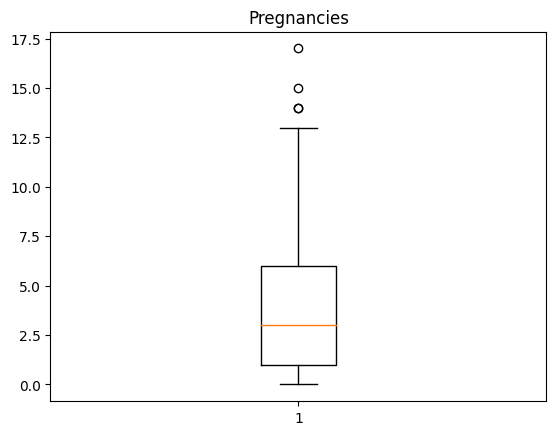

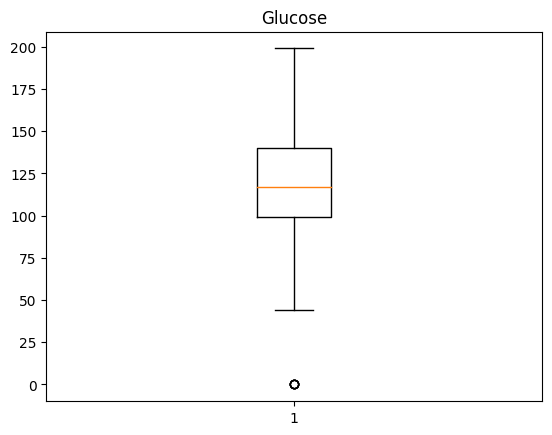

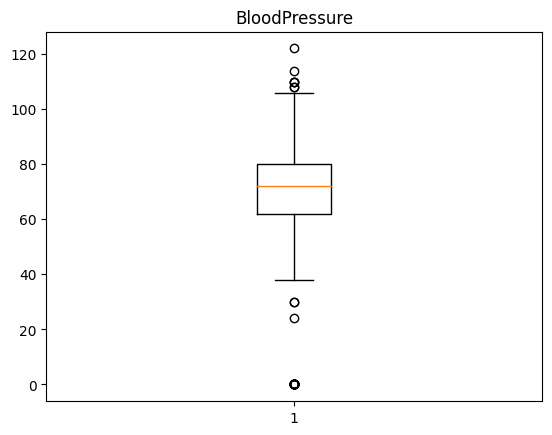

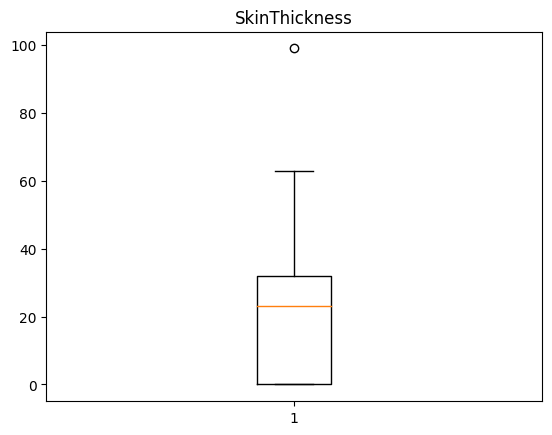

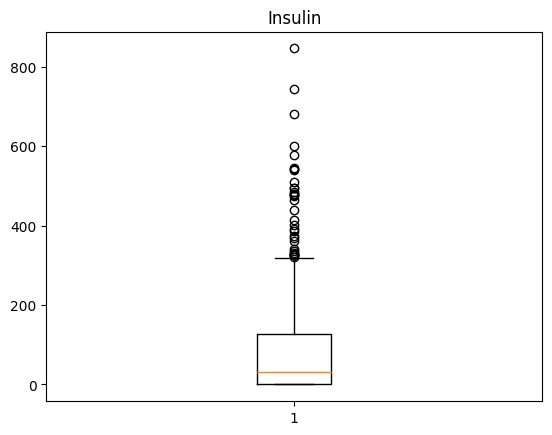

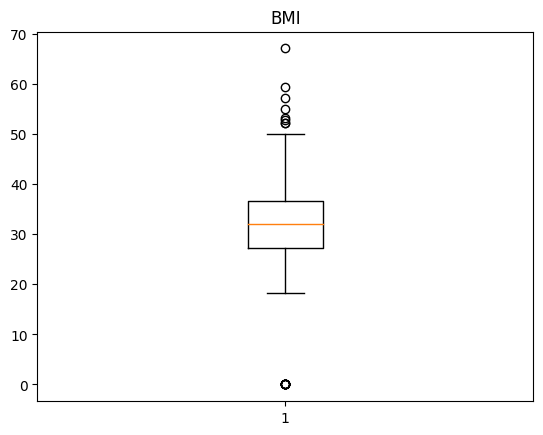

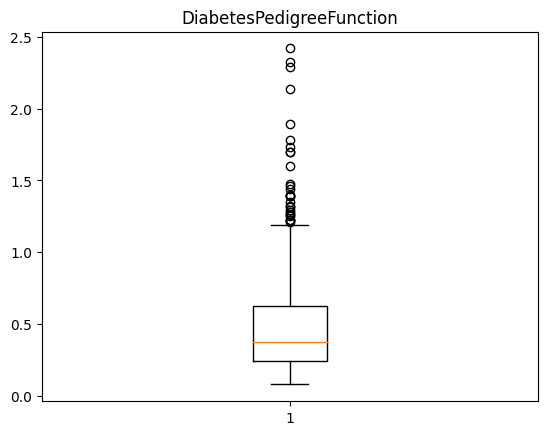

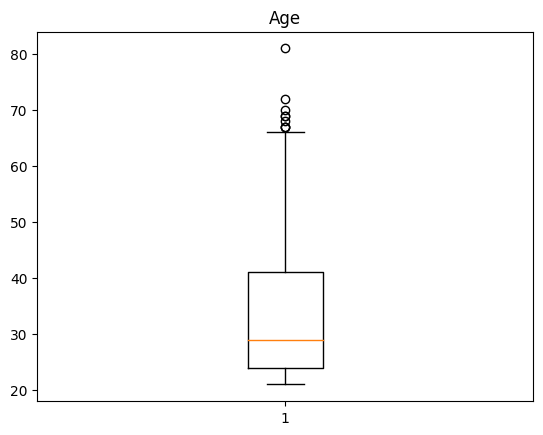

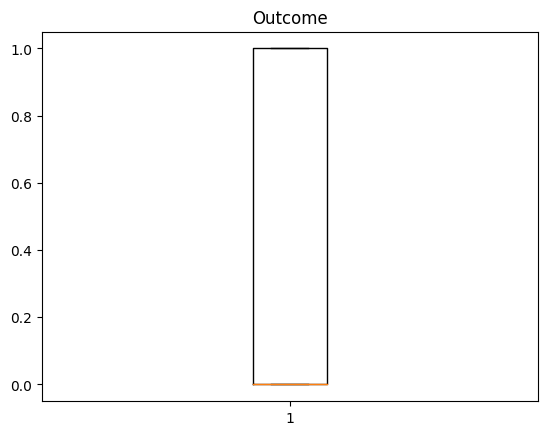

In [ ]:
for i  in data.columns:
  if data[i].dtype != "object":
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
out_col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
for col in out_col:
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)
  IQR=Q3-Q1
  LL=Q1-1.5*IQR
  UL=Q3+1.5*IQR
  data=data[(data[col]>=LL) & (data[col]<=UL)]

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130759,0.206581,-0.088675,-0.090608,0.037389,-0.013274,0.582318,0.235631
Glucose,0.130759,1.000000,0.227750,0.017161,0.280328,0.193989,0.051546,0.268977,0.493355
BloodPressure,0.206581,0.227750,1.000000,0.039799,-0.019897,0.290307,0.022308,0.345872,0.171178
SkinThickness,-0.088675,0.017161,0.039799,1.000000,0.475258,0.383783,0.165758,-0.122427,0.042490
Insulin,-0.090608,0.280328,-0.019897,0.475258,1.000000,0.177380,0.225171,-0.053711,0.114653
BMI,0.037389,0.193989,0.290307,0.383783,0.177380,1.000000,0.148256,0.066110,0.268268
DiabetesPedigreeFunction,-0.013274,0.051546,0.022308,0.165758,0.225171,0.148256,1.000000,0.031168,0.168112
Age,0.582318,0.268977,0.345872,-0.122427,-0.053711,0.066110,0.031168,1.000000,0.267017
Outcome,0.235631,0.493355,0.171178,0.042490,0.114653,0.268268,0.168112,0.267017,1.000000


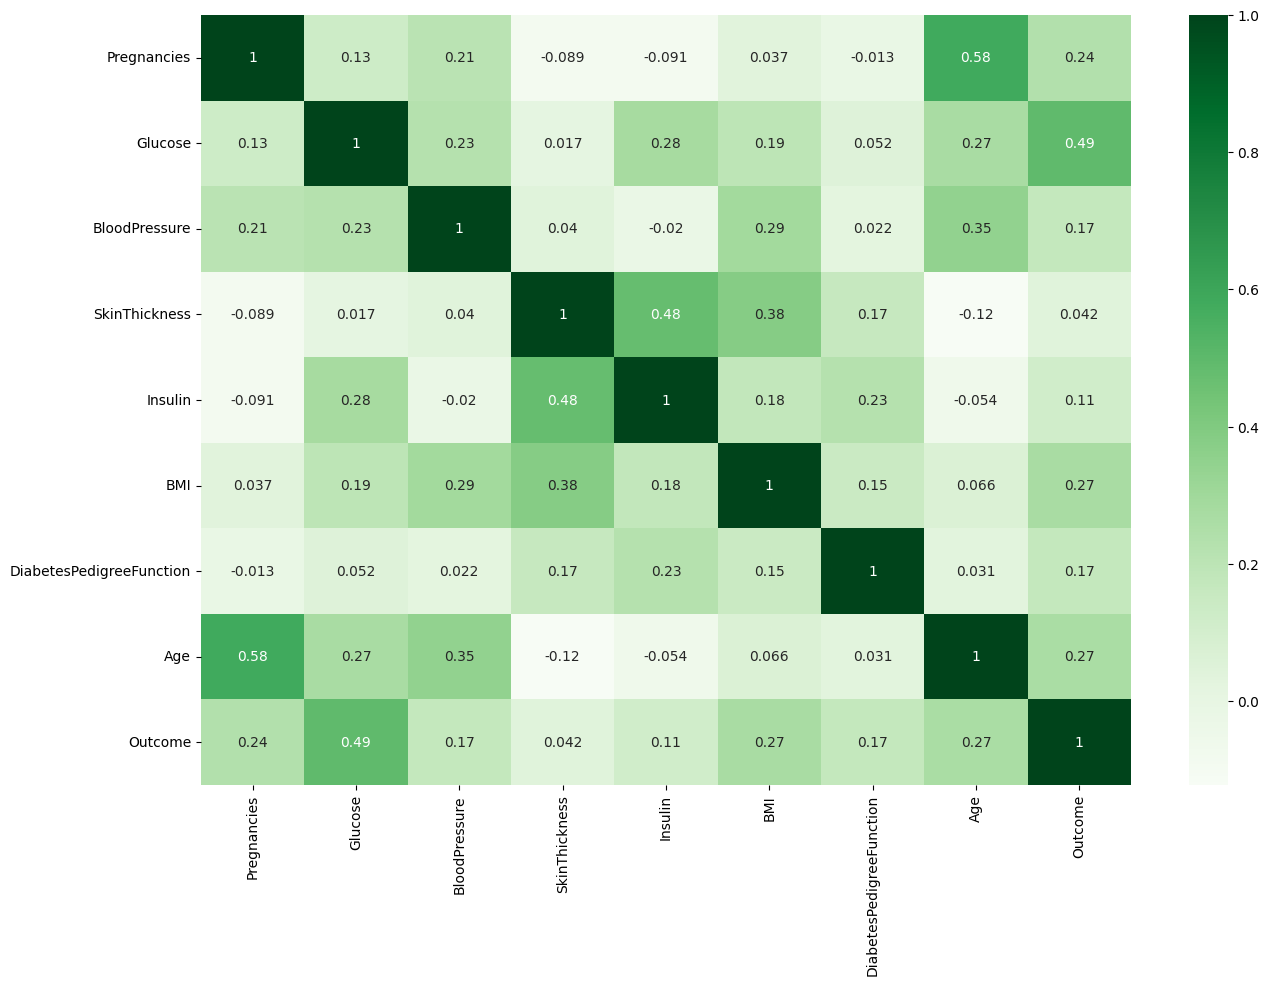

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="Greens")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
cols=[]
for i in data.columns:
  if i !="Outcome":
    cols.append(i)

In [ ]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
x=data[cols]

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
vif_data=pd.DataFrame()
vif_data["feat"]=x.columns
vif_data["multicol"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_data

,feat,multicol
0,Pregnancies,3.564961
1,Glucose,20.935630
2,BloodPressure,36.776252
3,SkinThickness,4.421211
4,Insulin,2.522852
5,BMI,30.718790
6,DiabetesPedigreeFunction,4.232387
7,Age,17.178278


In [ ]:
x.drop(["BloodPressure"],axis=1,inplace=True)

<ipython-input-28-d009820ee270>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["BloodPressure"],axis=1,inplace=True)


In [ ]:
vif_data=pd.DataFrame()
vif_data["feat"]=x.columns
vif_data["multicol"]=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]

In [ ]:
vif_data

,feat,multicol
0,Pregnancies,3.555829
1,Glucose,18.475613
2,SkinThickness,4.417095
3,Insulin,2.470962
4,BMI,21.282906
5,DiabetesPedigreeFunction,4.207986
6,Age,14.997478


In [ ]:
x.drop(["BMI"],axis=1,inplace=True)

<ipython-input-31-bfe482d3653e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["BMI"],axis=1,inplace=True)


In [ ]:
vif_data=pd.DataFrame()
vif_data["feat"]=x.columns
vif_data["multicol"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]

In [ ]:
vif_data

,feat,multicol
0,Pregnancies,3.543970
1,Glucose,11.990352
2,SkinThickness,3.391364
3,Insulin,2.370575
4,DiabetesPedigreeFunction,3.970113
5,Age,13.924555


In [ ]:
x.drop(["Age"],axis=1,inplace=True)

<ipython-input-34-b7cfc8a9b6d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["Age"],axis=1,inplace=True)


In [ ]:
vif_data=pd.DataFrame()
vif_data["feat"]=x.columns
vif_data["multicol"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]

In [ ]:
vif_data

,feat,multicol
0,Pregnancies,2.404395
1,Glucose,5.921925
2,SkinThickness,3.379544
3,Insulin,2.321547
4,DiabetesPedigreeFunction,3.840962


In [ ]:
x.drop(["Glucose"],axis=1,inplace=True)

<ipython-input-37-4bc8d72b95b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["Glucose"],axis=1,inplace=True)


In [ ]:
vif_data=pd.DataFrame()
vif_data["feat"]=x.columns
vif_data["multicol"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]

In [ ]:
vif_data

,feat,multicol
0,Pregnancies,1.809402
1,SkinThickness,3.109196
2,Insulin,2.244273
3,DiabetesPedigreeFunction,2.852741


In [ ]:
x

,Pregnancies,SkinThickness,Insulin,DiabetesPedigreeFunction
0,6,35,0,0.627
1,1,29,0,0.351
2,8,0,0,0.672
3,1,23,94,0.167
5,5,0,0,0.201
...,...,...,...,...
763,10,48,180,0.171
764,2,27,0,0.340
765,5,23,112,0.245
766,1,0,0,0.349


In [ ]:
y=data.loc[:,"Outcome"]

In [ ]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 636, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=log.predict(x_test)

In [ ]:
from  sklearn.metrics import  *
accuracy_score(y_test,y_pred)


0.7015706806282722

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[124,   3],
       [ 54,  10]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data.drop("Outcome",axis=1)

In [ ]:
y=data["Outcome"]

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 636, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()

In [ ]:
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=nb.predict(x_test)

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_test,y_pred)

0.7539267015706806

In [ ]:
f1_score(y_test,y_pred,average="weighted")

0.7546291707998416

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       138
           1       0.56      0.57      0.56        53

    accuracy                           0.75       191
   macro avg       0.69      0.70      0.69       191
weighted avg       0.76      0.75      0.75       191



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[114  24]
 [ 23  30]]
